In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

einstein = pd.read_csv('stud_math.xls')

In [2]:
display(einstein.head(10))
einstein.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [3]:
# В датасете 395 строк, почти все столбцы имеют 5-10% пустых значений

# 3 столбца с количественными признаками(имеющими осмысленную шкалу) - age, absence, score(целевой признак)
# У количественных признаков различные статистики, в том числе среднее и стандатное отклонение нуждаются в
# вещественной шкале

# 10 столбцов с порядковыми признаками(без шкалы, но с отношением порядка) - оставшиеся столбцы с числовыми значениями
# Для порядковых признаков можно определить моду и медиану в качестве статистики центральной тенденции 
# и квантили в качестве статистик разброса

# 17 столбцов с категориальными признаками(не имеющими ни того, ни другого) - все столбцы типа object
# У категориальных не может быть никакой сводной статистики кроме моды
einstein.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [4]:
# Приводим названия столбцов к стандарту PEP8
einstein.columns = ['school', 'sex', 'age', 'address', 'family_size', 'parents_status', 'mother_edu', 'father_edu',
                    'mother_job', 'father_job', 'reason', 'guardian', 'travel_time', 'study_time',
                    'failures', 'school_support', 'fam_support', 'paid', 'activities', 'nursery',
                    'study_time_granular', 'higher', 'internet', 'romantic', 'family_relations',
                    'free_time', 'go_out', 'health', 'absences', 'score'
                   ]
display(einstein.head())

,school,sex,age,address,family_size,parents_status,mother_edu,father_edu,mother_job,father_job,reason,guardian,travel_time,study_time,failures,school_support,fam_support,paid,activities,nursery,study_time_granular,higher,internet,romantic,family_relations,free_time,go_out,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [5]:
# Столбец 'study_time_granular' в описании задания не указан. Сравним его со столбцом 'study_time'
display(pd.DataFrame(einstein.study_time.value_counts()), pd.DataFrame(einstein.study_time_granular.value_counts()))

,study_time
2.0,194
1.0,103
3.0,64
4.0,27


,study_time_granular
-6.0,194
-3.0,103
-9.0,64
-12.0,27


In [6]:
# Видим 100%-ную корреляцию. Убираем столбец 'study_time_granular', для анализа он не пригодится
einstein.drop(['study_time_granular'], inplace = True, axis = 1)

In [7]:
# Определим функцию isNaN_column() для подсчета количества уникальных и пустых значений в столбце и замены пустых на None

def isNaN(num):
    return num != num


def isNaN_column(col):
    empty = len(col) - isNaN(col).value_counts()[False]
    print(' В столбце {}'.format(empty), 'пустых значений и {} уникальных'.format(len(col.value_counts())))
    col = col.apply(lambda x: None if isNaN(x) else None if x == 'nan' else x)
    display(col.sort_values().unique(), col.sort_values().value_counts())
    return col

In [8]:
# Определим функцию outliers_column() для проверки наличия выбросов в столбце и вывода некоторых стат. данных столбца

def outliers_column(col):
    
    empty = len(col) - isNaN(col).value_counts()[False]
    perc25 = col.quantile(0.25)
    perc75 = col.quantile(0.75)
    IQR = perc75 - perc25
    left = perc25 - 1.5*IQR
    right = perc75 + 1.5*IQR
    
    print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), 'IQR: {}, '.format(IQR),
          'Границы выбросов: [{l}, {r}]'.format(l=left, r=right),
          'Количество выбросов: {}.'.format(len(col) - len(col.loc[col.between(left, right)])-empty))

In [9]:
# Теперь рассмотрим по-порядку оставшиеся 29 признаков
# К каждому применим ф-цию isNaN_column() для подсчета уникальных и пустых значений в столбце и замены пустых на None

# Для количественных построим гистограммы и уберем выбросы

# Для порядковых построим графики boxplot и посчитаем квантили. Шкалы(тем более линейной шкалы) у порядковых нет, поэтому
# искать выбросы не совсем корректно. Но посчитаем их и посмотрим в каждом отдельном случае, исходя из здравого смысла,
# стоит ли их убирать

# Для категориальных ограничимся применением isNaN_column()

In [10]:
# school. Бинарный категориальный признак
# Пустых значений нет, 2 уникальных, каждое встречается больше 30ти раз. 
# Можем в будущем анализировать распределения оценок и протестировать, в частности, нулевую гипотезу об
# отсутствии разницы параметров распределений оценок по GP и MS
einstein.school = isNaN_column(einstein.school)

 В столбце 0 пустых значений и 2 уникальных


array(['GP', 'MS'], dtype=object)

GP    349
MS     46
Name: school, dtype: int64

In [11]:
# sex. Аналогично school
einstein.sex = isNaN_column(einstein.sex)

 В столбце 0 пустых значений и 2 уникальных


array(['F', 'M'], dtype=object)

F    208
M    187
Name: sex, dtype: int64

In [12]:
# age. Количественный признак без пропусков, 8 уникальных значений
einstein.age = isNaN_column(einstein.age)

 В столбце 0 пустых значений и 8 уникальных


array([15, 16, 17, 18, 19, 20, 21, 22], dtype=int64)

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0] Количество выбросов: 1.


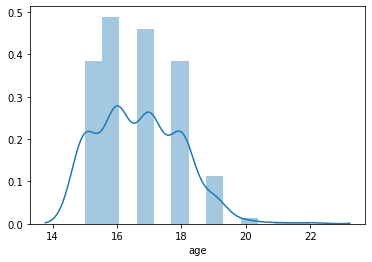

In [13]:
# age. Строим гистограмму
sns.distplot(einstein.age)
einstein.age.describe()
# Проверяем на выбросы
outliers_column(einstein.age)

In [14]:
# age. Видим 1 выброс, убираем его
einstein = einstein.loc[einstein.age <= 21]
# Для анализа распределений оценок по возрастам можно будет использовать значение 
# возраста от 15 до 19 включительно. Для 20 и 21 слишком мало данных

In [15]:
# address. 2 уникальных значения, 17 пустых. Преобразуем его.
einstein.address = isNaN_column(einstein.address)
# Оба уникальных значения встречаются в достаточном для анализа распределения оценки количестве
# Пустые значения можем заполнить для анализа случайным образом уникальными с сохранением существующей пропорции
# Но в данном случае это вряд ли что-то даст, оставляем None

 В столбце 17 пустых значений и 2 уникальных


array(['R', 'U', None], dtype=object)

U    294
R     83
Name: address, dtype: int64

In [16]:
# family_size. 2 уникальных значения, 27 пустых
einstein.family_size = isNaN_column(einstein.family_size)
# Видим, что маленьких семей гораздо меньше, но для анализа достаточно

 В столбце 27 пустых значений и 2 уникальных


array(['GT3', 'LE3', None], dtype=object)

GT3    260
LE3    107
Name: family_size, dtype: int64

In [17]:
# parents_status. 2 уникальных значения, 45 пустых. Для анализа хватает
einstein.parents_status = isNaN_column(einstein.parents_status)

 В столбце 45 пустых значений и 2 уникальных


array(['A', 'T', None], dtype=object)

T    313
A     36
Name: parents_status, dtype: int64

In [18]:
# mother_edu. Порядковый признак, 5 уникальных значений, 3 пустых 
einstein.mother_edu = isNaN_column(einstein.mother_edu)

 В столбце 3 пустых значений и 5 уникальных


array([ 0.,  1.,  2.,  3.,  4., nan])

4.0    131
2.0    102
3.0     96
1.0     59
0.0      3
Name: mother_edu, dtype: int64

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0] Количество выбросов: 0.


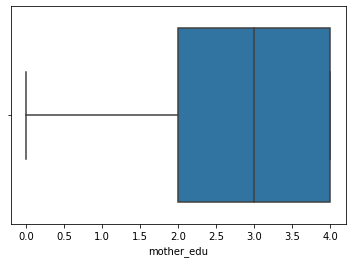

In [19]:
# mother_edu. Проверяем, выбросов нет. Распределение сильно смещено вправо
outliers_column(einstein.mother_edu)
sns.boxplot(x='mother_edu', data = einstein)

 В столбце 24 пустых значений и 6 уникальных


array([ 0.,  1.,  2.,  3.,  4., 40., nan])

2.0     106
3.0      96
4.0      88
1.0      77
0.0       2
40.0      1
Name: father_edu, dtype: int64

25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5] Количество выбросов: 3.


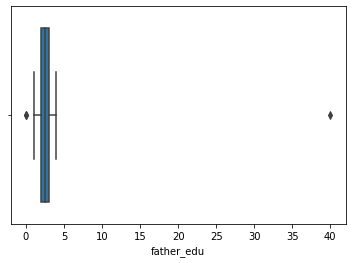

In [20]:
# father_edu. 6 уникальных значений, 24 пустых. 
einstein.father_edu = isNaN_column(einstein.father_edu)
# Проверяем на выбросы
outliers_column(einstein.father_edu)
sns.boxplot(x='father_edu', data = einstein)

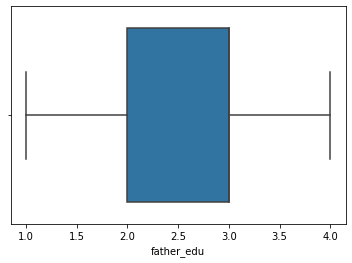

In [21]:
# father_edu. Убираем 3 выброса, оставляя при этом пустые, чтобы не терять данные в других столбцах
einstein = einstein.loc[einstein.father_edu.between(0.5, 4.5) | isNaN(einstein.father_edu)]
sns.boxplot(x='father_edu', data = einstein)
# Получаем 4 значения father_edu, пригодных для анализа распределения оценки

In [22]:
len(einstein)

391

In [23]:
# mother_job. Категориальный признак. Данных для каждого значения признака достаточно много для анализа score
einstein.mother_job = isNaN_column(einstein.mother_job)

 В столбце 19 пустых значений и 5 уникальных


array(['at_home', 'health', 'other', 'services', 'teacher', None],
      dtype=object)

other       132
services     96
at_home      58
teacher      54
health       32
Name: mother_job, dtype: int64

In [24]:
# father_job. Здесь кол-во значений at_home и health близко к 10, для грубого анализа хватит
einstein.father_job = isNaN_column(einstein.father_job)

 В столбце 36 пустых значений и 5 уникальных


array(['at_home', 'health', 'other', 'services', 'teacher', None],
      dtype=object)

other       194
services    101
teacher      29
at_home      16
health       15
Name: father_job, dtype: int64

In [25]:
# reason. Категориальный признак 
einstein.reason = isNaN_column(einstein.reason)

 В столбце 17 пустых значений и 4 уникальных


array(['course', 'home', 'other', 'reputation', None], dtype=object)

course        136
home          104
reputation    101
other          33
Name: reason, dtype: int64

In [26]:
# guardian. Тоже категориальный.
einstein.guardian = isNaN_column(einstein.guardian)

 В столбце 31 пустых значений и 3 уникальных


array(['father', 'mother', 'other', None], dtype=object)

mother    247
father     85
other      28
Name: guardian, dtype: int64

 В столбце 28 пустых значений и 4 уникальных


array([ 1.,  2.,  3.,  4., nan])

1.0    241
2.0     94
3.0     21
4.0      7
Name: travel_time, dtype: int64

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5] Количество выбросов: 7.


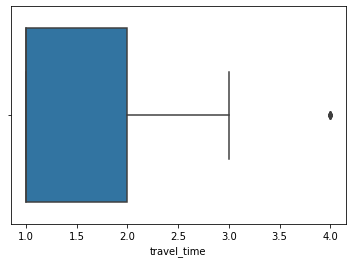

In [27]:
# travel_time. Порядковый признак, проверим на выбросы
einstein.travel_time = isNaN_column(einstein.travel_time)
outliers_column(einstein.travel_time)
sns.boxplot(x='travel_time', data = einstein)

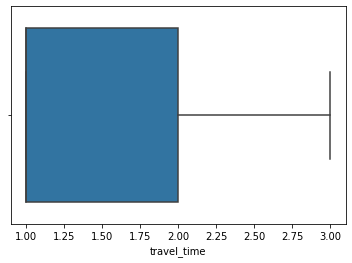

In [28]:
# travel_time. Убираем 7 выбросов на значении 4, их все равно мало для анализа score
einstein = einstein.loc[einstein.travel_time.between(-0.5, 3.5) | isNaN(einstein.travel_time)]
sns.boxplot(x='travel_time', data = einstein)

 В столбце 7 пустых значений и 4 уникальных


array([ 1.,  2.,  3.,  4., nan])

2.0    191
1.0     99
3.0     62
4.0     25
Name: study_time, dtype: int64

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5] Количество выбросов: 25.


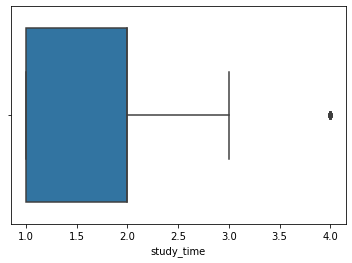

In [29]:
# study_time. Порядковый признак, проверим на выбросы
einstein.study_time = isNaN_column(einstein.study_time)
outliers_column(einstein.study_time)
sns.boxplot(x='study_time', data = einstein)
# Выбросы оставим, т.к. это одно значение параметра в кол-ве, достаточном для анализа score

In [30]:
# failures. Распределение очень сильно смещено влево, так что анализ на выбросы ничего не дает
einstein.failures = isNaN_column(einstein.failures)
outliers_column(einstein.failures)
# Выбросы не будем удалять по той же причине

 В столбце 20 пустых значений и 4 уникальных


array([ 0.,  1.,  2.,  3., nan])

0.0    287
1.0     49
2.0     16
3.0     12
Name: failures, dtype: int64

25-й перцентиль: 0.0, 75-й перцентиль: 0.0, IQR: 0.0,  Границы выбросов: [0.0, 0.0] Количество выбросов: 77.


In [31]:
# school_support. Следующие 8 столбцов содержат бинарные категориальные признаки, ничего необычного в них не видно
einstein.school_support = isNaN_column(einstein.school_support)

 В столбце 9 пустых значений и 2 уникальных


array(['no', 'yes', None], dtype=object)

no     326
yes     49
Name: school_support, dtype: int64

In [32]:
# fam_support
einstein.fam_support = isNaN_column(einstein.fam_support)

 В столбце 36 пустых значений и 2 уникальных


array(['no', 'yes', None], dtype=object)

yes    215
no     133
Name: fam_support, dtype: int64

In [33]:
# paid
einstein.paid = isNaN_column(einstein.paid)

 В столбце 39 пустых значений и 2 уникальных


array(['no', 'yes', None], dtype=object)

no     193
yes    152
Name: paid, dtype: int64

In [34]:
# activities
einstein.activities = isNaN_column(einstein.activities)

 В столбце 14 пустых значений и 2 уникальных


array(['no', 'yes', None], dtype=object)

yes    188
no     182
Name: activities, dtype: int64

In [35]:
# nursery
einstein.nursery = isNaN_column(einstein.nursery)

 В столбце 16 пустых значений и 2 уникальных


array(['no', 'yes', None], dtype=object)

yes    291
no      77
Name: nursery, dtype: int64

In [36]:
# higher
einstein.higher = isNaN_column(einstein.higher)

 В столбце 17 пустых значений и 2 уникальных


array(['no', 'yes', None], dtype=object)

yes    350
no      17
Name: higher, dtype: int64

In [37]:
# internet
einstein.internet = isNaN_column(einstein.internet)

 В столбце 34 пустых значений и 2 уникальных


array(['no', 'yes', None], dtype=object)

yes    295
no      55
Name: internet, dtype: int64

In [38]:
# romantic
einstein.romantic = isNaN_column(einstein.romantic)

 В столбце 31 пустых значений и 2 уникальных


array(['no', 'yes', None], dtype=object)

no     235
yes    118
Name: romantic, dtype: int64

 В столбце 27 пустых значений и 6 уникальных


array([-1.,  1.,  2.,  3.,  4.,  5., nan])

 4.0    177
 5.0     95
 3.0     61
 2.0     17
 1.0      6
-1.0      1
Name: family_relations, dtype: int64

25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 1.0,  Границы выбросов: [2.5, 6.5] Количество выбросов: 24.


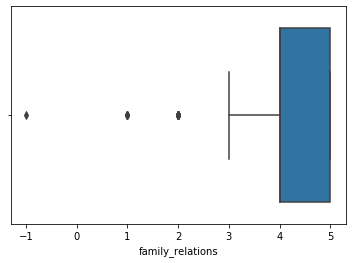

In [39]:
# family_relations. Порядковый признак, проверим на выбросы
einstein.family_relations = isNaN_column(einstein.family_relations)
outliers_column(einstein.family_relations)
sns.boxplot(x='family_relations', data = einstein)

In [40]:
# family_relations. Видим 24 выброса, но по значению 2 есть 17 результатов, оставим их,а по значениям -1 и 1 уберем 7 
einstein = einstein.loc[einstein.family_relations.between(2.0, 5.0) | isNaN(einstein.family_relations)]

 В столбце 11 пустых значений и 5 уникальных


array([ 1.,  2.,  3.,  4.,  5., nan])

3.0    146
4.0    108
2.0     59
5.0     36
1.0     17
Name: free_time, dtype: int64

25-й перцентиль: 3.0, 75-й перцентиль: 4.0, IQR: 1.0,  Границы выбросов: [1.5, 5.5] Количество выбросов: 17.


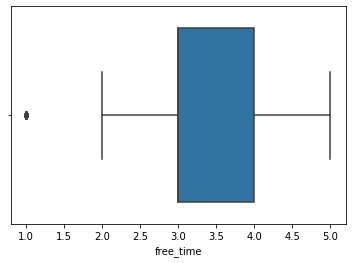

In [41]:
# free_time. Порядковый признак. Распределение нормальное, выбросы убирать не будем
einstein.free_time = isNaN_column(einstein.free_time)
outliers_column(einstein.free_time)
sns.boxplot(x='free_time', data = einstein)

 В столбце 8 пустых значений и 5 уникальных


array([ 1.,  2.,  3.,  4.,  5., nan])

3.0    124
2.0     93
4.0     84
5.0     46
1.0     22
Name: go_out, dtype: int64

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0] Количество выбросов: 0.


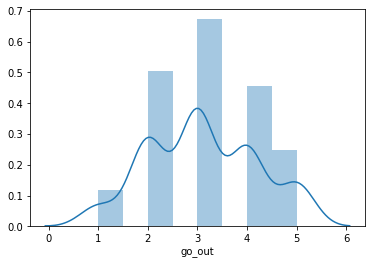

In [42]:
# go_out. Порядковый признак. Распределение нормальное, выбросов нет. Построим для разнообразия гистограмму
einstein.go_out = isNaN_column(einstein.go_out)
sns.distplot(einstein.go_out)
outliers_column(einstein.go_out)

 В столбце 14 пустых значений и 5 уникальных


array([ 1.,  2.,  3.,  4.,  5., nan])

5.0    133
3.0     86
4.0     60
2.0     43
1.0     41
Name: health, dtype: int64

25-й перцентиль: 3.0, 75-й перцентиль: 5.0, IQR: 2.0,  Границы выбросов: [0.0, 8.0] Количество выбросов: 0.


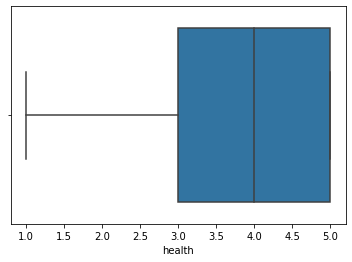

In [43]:
# health. Порядковый признак. Распределение нормальное со смещением вправо, выбросов нет
einstein.health = isNaN_column(einstein.health)
sns.boxplot(x='health', data = einstein)
outliers_column(einstein.health)

 В столбце 12 пустых значений и 36 уникальных


array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  28.,  30.,  38.,  40.,  54.,  56.,
        75., 212., 385.,  nan])

0.0      108
2.0       57
4.0       51
6.0       29
8.0       19
10.0      16
12.0      12
14.0       9
3.0        8
16.0       6
7.0        6
18.0       5
5.0        4
20.0       4
22.0       3
1.0        3
9.0        3
15.0       2
11.0       2
13.0       2
385.0      1
212.0      1
19.0       1
21.0       1
23.0       1
24.0       1
25.0       1
26.0       1
28.0       1
30.0       1
38.0       1
40.0       1
54.0       1
56.0       1
75.0       1
17.0       1
Name: absences, dtype: int64

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0] Количество выбросов: 17.


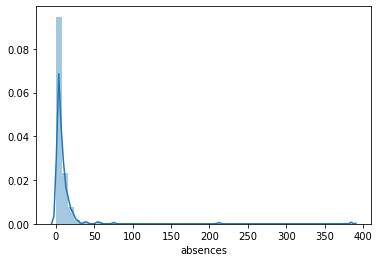

In [44]:
# absences. Количественный признак. Распределение нормальное, имеет малую дисперсию и длинный хвост справа.
einstein.absences = isNaN_column(einstein.absences)
sns.distplot(einstein.absences)
outliers_column(einstein.absences)

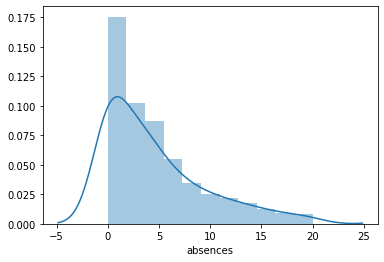

In [45]:
# absences. Убираем 17 выбросов и еще раз рисуем гистограмму
einstein = einstein.loc[einstein.absences.between(0.0, 20.0) | isNaN(einstein.absences)]
sns.distplot(einstein.absences)

 В столбце 6 пустых значений и 17 уникальных


array([  0.,  25.,  30.,  35.,  40.,  45.,  50.,  55.,  60.,  65.,  70.,
        75.,  80.,  85.,  90.,  95., 100.,  nan])

50.0     50
55.0     40
0.0      36
75.0     33
65.0     28
60.0     28
70.0     27
40.0     26
45.0     22
80.0     14
30.0     14
90.0     10
35.0      8
25.0      7
95.0      5
85.0      5
100.0     1
Name: score, dtype: int64

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0] Количество выбросов: 0.


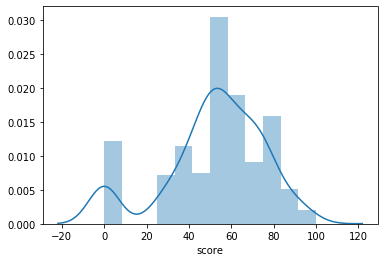

In [46]:
# score. Количественный признак, целевой для анализа. Распределен нормально.
einstein.score = isNaN_column(einstein.score)
sns.distplot(einstein.score)
outliers_column(einstein.score)

In [47]:
# Суммарно убрали 35 строк из исходного датафрейма из-за выбросов
len(einstein)

360

In [48]:
# Все столбцы прошли предварительный просмотр и обработку. Переходим к следующему этапу - 
# отбору столбцов для построения модели формирования итоговой оценки 

,age,absences,score
age,1.000000,0.140293,-0.155306
absences,0.140293,1.000000,0.082726
score,-0.155306,0.082726,1.000000


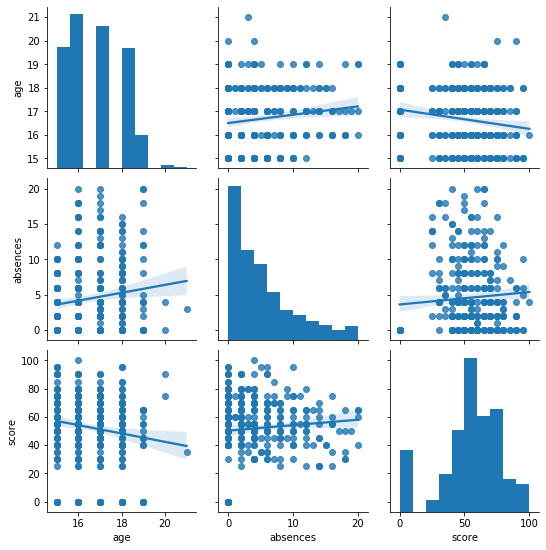

In [49]:
# Проверим количественные признаки на корреляцию между друг с другом
ein = einstein[['age','absences','score']]
sns.pairplot(ein, kind = 'reg')
ein.corr()

In [50]:
# Видим, что корреляция числовых переменных age и absences со score незначительная, убрать их из дальнейшего анализа не можем 

In [51]:
# Посмотрим, различаются ли распределения оценки в зависимости от значений категориальных или порядковых переменных
# сначала с помощью графиков boxplot

In [52]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (7, 4))
    sns.boxplot(x=column, y='score', data=einstein, ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

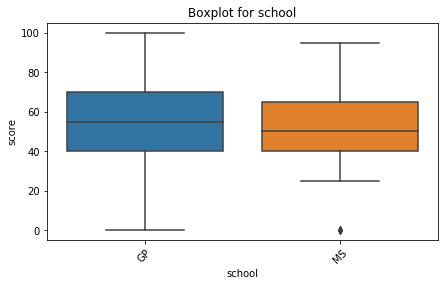

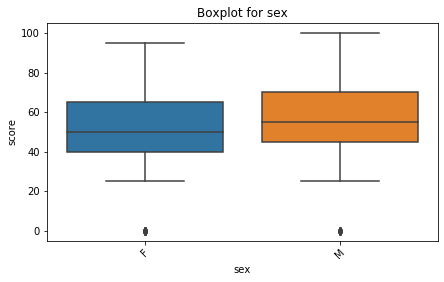

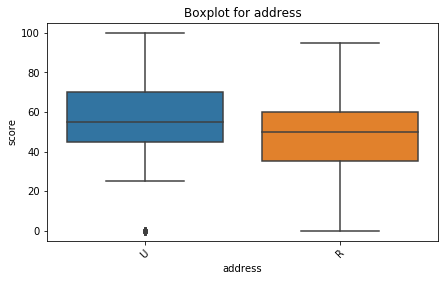

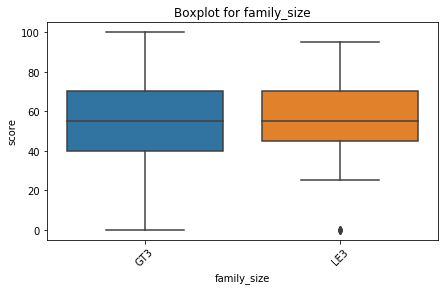

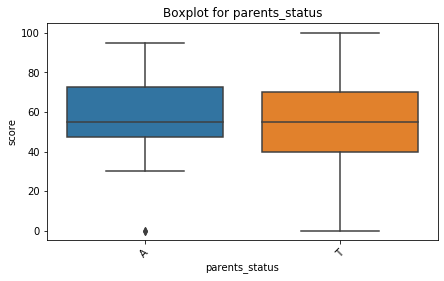

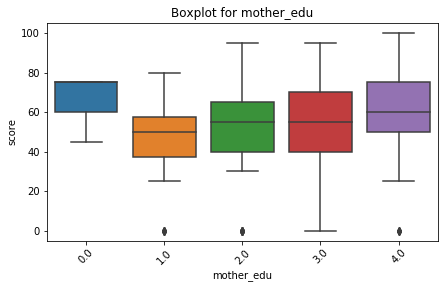

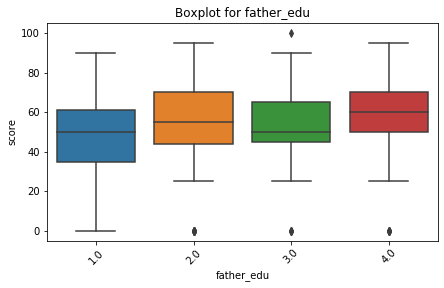

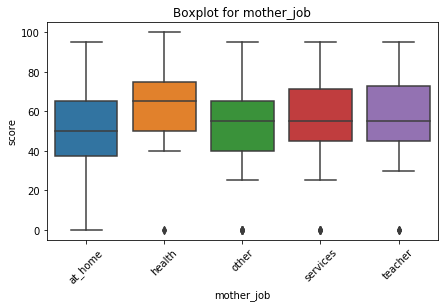

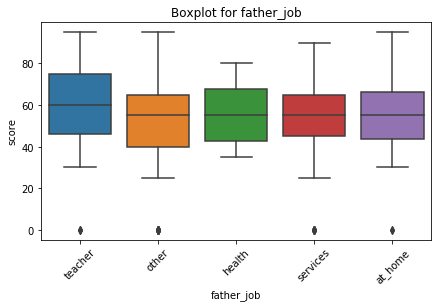

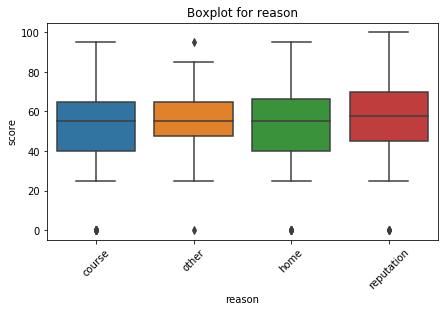

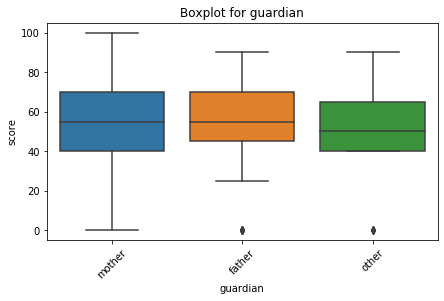

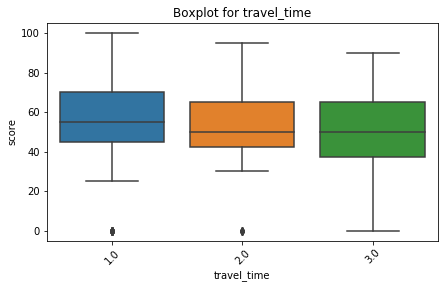

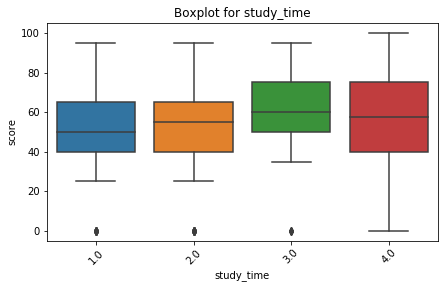

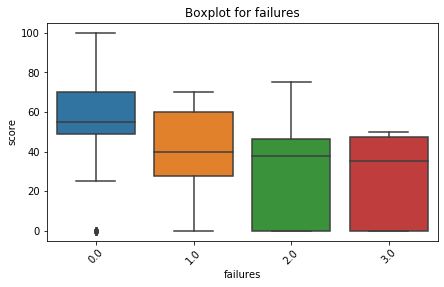

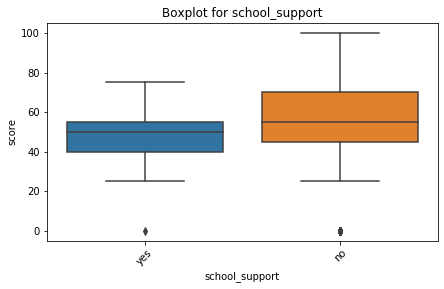

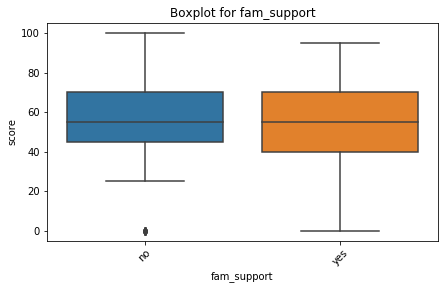

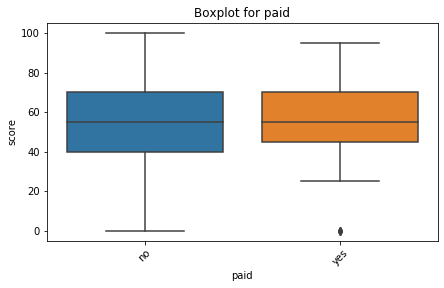

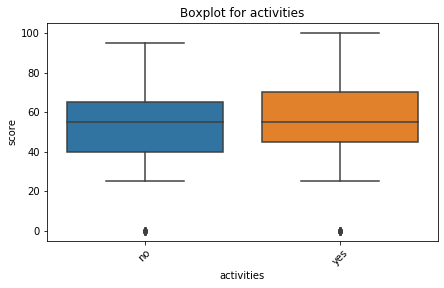

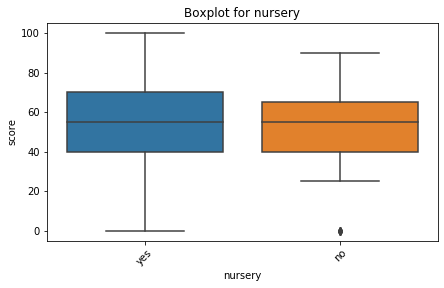

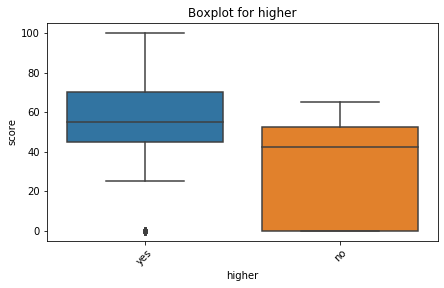

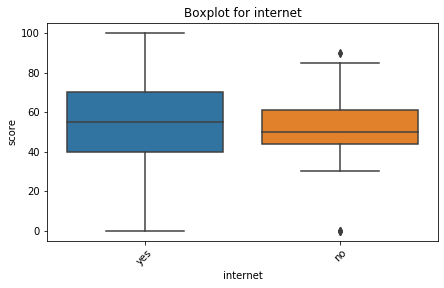

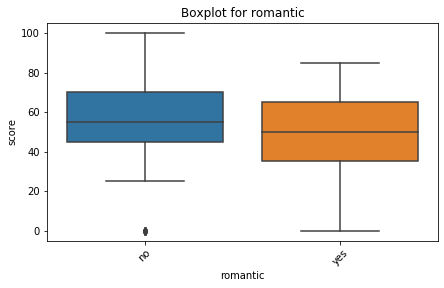

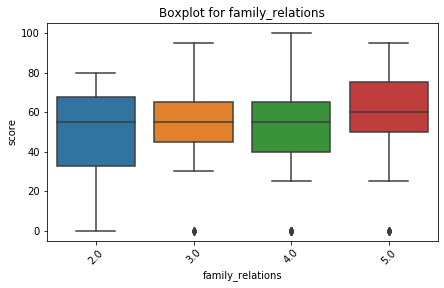

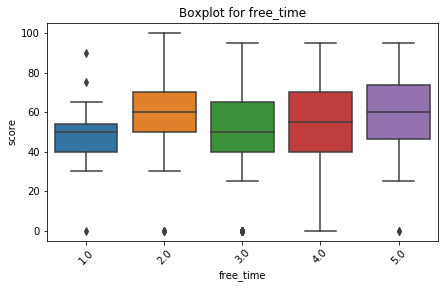

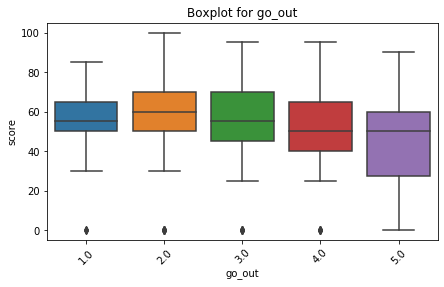

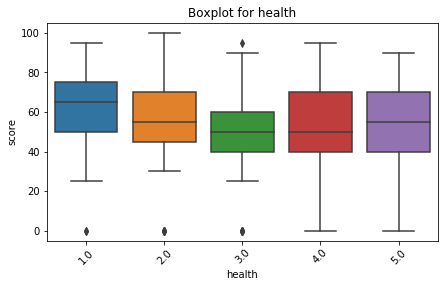

In [53]:
for column in einstein:
    if column in ['age','absences','score']:
        continue
    else:
        get_boxplot(column)

In [54]:
# Видим, что в некоторых переменных(напр., mother_edu) есть различия
# Но, насколько они существенные, лучше проверить с помощью теста Стьюдента

In [55]:
# Функция для теста Стьюдента на гипотезу о нулевой разнице параметров распределений итоговой оценки(score)
# по парам значений из категориальных или порядковых столбцов на уровне доверия 95% с учетом поправки Бонферрони

def get_stat_dif(column):
    cols = einstein.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        pvalue = ttest_ind(einstein.loc[einstein.loc[:, column] == comb[0], 'score'], 
                           einstein.loc[einstein.loc[:, column] == comb[1], 'score'], nan_policy='omit').pvalue
        if pvalue <= 0.05/len(combinations_all): # Учли поправку Бонферрони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [56]:
# Проведем тест Стьюдента на всех категориальных или порядковых признаках
for column in einstein:
    if column in ['age','absences','score']:
        continue
    else:
        get_stat_dif(column)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки mother_edu
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


In [57]:
# Видим, что существенные для итоговой оценки различия есть только в 6 столбцах из 26  
# Добавляем их к 2 количественным и получаем 8 столбцов для анализа
einstein_for_model = einstein.loc[:, ['sex', 'address', 'mother_edu', 'failures', 'higher', 'romantic', 'age', 'absences']]
einstein_for_model.head()

,sex,address,mother_edu,failures,higher,romantic,age,absences
0,F,U,4.0,0.0,yes,no,18,6.0
1,F,U,1.0,0.0,yes,no,17,4.0
2,F,U,1.0,3.0,yes,None,15,10.0
3,F,U,4.0,0.0,yes,yes,15,2.0
4,F,U,3.0,0.0,yes,no,16,4.0


In [58]:
# ИТОГИ
# В результате EDA для анализа влияния условий жизни учеников на итоговые оценки по математике были получены следующие выводы:

# Данные достаточно полные, в среднем 5-10% пустых значений на признак.

# Выбросов удалено 35 в 5ти признаках, особенно много их в признаке absences(17). Т.е., данные достаточно чистые.

# Определены 8 самых важных параметров, которые предлагается использовать в дальнейшем для построения модели: 
# sex, address, mother_edu, failures, higher, romantic, age, absences